---
title: "Feature Selection for Record Data"
---

In [183]:
## import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import random
from sklearn.feature_selection import VarianceThreshold
import itertools
from sklearn import datasets
import matplotlib.pyplot as plt



In [167]:
results = pd.read_csv('Data/cleanedResults.csv')
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,fastestLapTime_seconds
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,39,2,1:27.452,218.300,1,87.452
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,41,3,1:27.739,217.586,1,87.739
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,41,5,1:28.090,216.719,1,88.090
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,58,7,1:28.603,215.464,1,88.603
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,43,1,1:27.418,218.385,1,87.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,26079,1110,848,3,23,15,14,14,14,0.0,44,+1:36.184,35,3,1:49.841,229.553,1,109.841
6434,26080,1110,825,210,20,16,15,15,15,0.0,44,+1:41.754,27,14,1:50.993,227.171,1,110.993
6435,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,25,15,1:50.994,227.169,1,110.994
6436,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,37,9,1:50.486,228.213,1,110.486


In [168]:
def train_GNB_model(x_train, y_train, x_test, y_test, i_print = False):
    
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    
    y_pred = gnb.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, gnb.predict(x_train))

    if i_print:
        print(accuracy * 100, accuracy_train * 100)
    return accuracy_train, accuracy

In [175]:
features = ['driverId', 'constructorId', 'grid', 'fastestLapTime_seconds']
X = results[features]
y = results['position']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82)

In [177]:
train_GNB_model(X_train, y_train, X_test, y_test, i_print = True)

12.18944099378882 13.902912621359222


(0.13902912621359223, 0.12189440993788819)

In [178]:
N = X.shape[0]
l = [*range(N)]       # indices
cut = int(0.7 * N)    # 80% of the list
random.shuffle(l)     # randomize
train_index = l[:cut] # first 80% of shuffled list
test_index = l[cut:] 

In [179]:
# VARIANCE THRESHOLD SEARCH

x_var = np.var(X, axis = 0)
num_thresholds = 30
thresholds = np.linspace(np.min(x_var), np.max(x_var), num_thresholds)
thresholds = thresholds[1:-2]

num_features = []
train_accuracies = []
test_accuracies = []

(acc_train, acc_test) = train_GNB_model(X_train, y_train, X_test, y_test, i_print = True)
num_features.append(X.shape[1])
train_accuracies.append(acc_train)
test_accuracies.append(acc_test)

for THRESHOLD in thresholds:
    feature_selector = VarianceThreshold(threshold = THRESHOLD)
    xtmp = feature_selector.fit_transform(X)
    print(THRESHOLD, xtmp.shape[1])
    
    # Use the indices to split the reduced feature set
    x_train_tmp = xtmp[train_index]
    y_train_tmp = y.iloc[train_index]
    x_test_tmp = xtmp[test_index]
    y_test_tmp = y.iloc[test_index]
    
    (acc_train, acc_test) = train_GNB_model(x_train_tmp, y_train_tmp, x_test_tmp, y_test_tmp, i_print = False)
             
    # RECORD 
    num_features.append(xtmp.shape[1])
    train_accuracies.append(acc_train)
    test_accuracies.append(acc_test)


12.18944099378882 13.902912621359222
5593.803083955906 2
11148.941345273512 1
16704.079606591116 1
22259.21786790872 1
27814.356129226322 1
33369.494390543936 1
38924.63265186154 1
44479.77091317914 1
50034.909174496745 1
55590.04743581435 1
61145.18569713196 1
66700.32395844956 1
72255.46221976716 1
77810.60048108477 1
83365.73874240236 1
88920.87700371997 1
94476.01526503758 1
100031.15352635518 1
105586.29178767279 1
111141.43004899038 1
116696.568310308 1
122251.7065716256 1
127806.8448329432 1
133361.98309426082 1
138917.12135557842 1
144472.25961689602 1
150027.3978782136 1


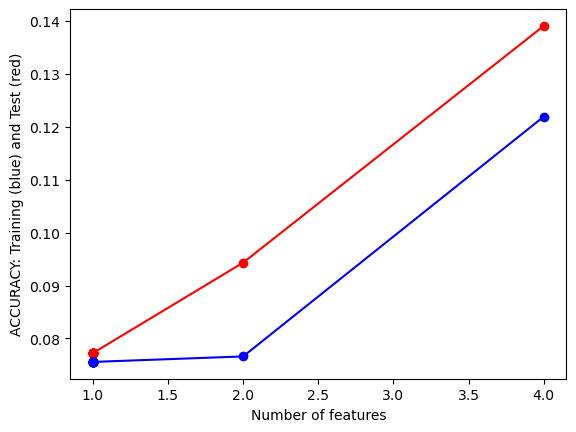

In [180]:
plt.plot(num_features, train_accuracies,'-or')
plt.plot(num_features, test_accuracies,'-ob')
plt.xlabel('Number of features')
plt.ylabel('ACCURACY: Training (blue) and Test (red)')
plt.show()

LABEL= 0


<Figure size 640x480 with 0 Axes>

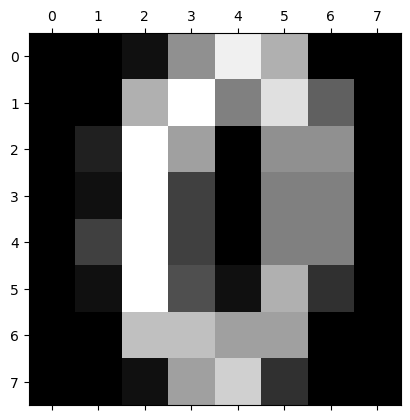

In [189]:
(x,y) = datasets.load_digits(n_class = 4, return_X_y = True, as_frame = False)
print("LABEL=",y[4])
plt.gray()
plt.matshow(x[4].reshape(8,8))
plt.show()

In [181]:
def maximize_CFS(x, y):
    df_x = x
    column_names = df_x.columns
    
    N = x.shape[0]
    l = [*range(N)]       # indices
    cut = int(0.7 * N)    # 80% of the list
    random.shuffle(l)     # randomize
    train_index = l[:cut] # first 80% of shuffled list
    test_index = l[cut:]  # last 20%

    max_accuracy = 0
    y_train = y[train_index]
    y_test = y[test_index]

    for L in range(1, len(column_names) + 1):
          for subset in itertools.combinations(column_names, L):
               temp = df_x[list(subset)]
               x_train = temp.iloc[train_index]
               x_test = temp.iloc[test_index]
               accuracy_train, accuracy = train_GNB_model(x_train, y_train, x_test, y_test)
               if accuracy > max_accuracy:
                     max_accuracy = accuracy
                     max_subset = list(subset)
                     print(f'found new max: {max_accuracy}  optimal features = {max_subset} \niteration= {L}, accuracy = {accuracy}')
    return max_accuracy, max_subset


In [182]:
x_opt = maximize_CFS(X, y)

found new max: 0.07349896480331262  optimal features = ['driverId'] 
iteration= 1, accuracy = 0.07349896480331262
found new max: 0.14078674948240166  optimal features = ['grid'] 
iteration= 1, accuracy = 0.14078674948240166
found new max: 0.14130434782608695  optimal features = ['driverId', 'grid', 'fastestLapTime_seconds'] 
iteration= 3, accuracy = 0.14130434782608695


# Final results for Naïve Bayes (NB) with Labeled Record Data

**Report and comment on the findings. It is required that you create code, appropriate visualizations, result summaries, confusion matrices, etc**
* I used three variables which is driver, the start grid position they are in the race, and the fastest lap time they did in the race to predict the final position they are at the end of the race. The result shows that there is no significant relationship between these three variables and the final position in a race which seems weird since the lap time and start grid position should have significant relationship with the final position by common sense.

**Describe how the trained model is tested on the testing dataset.**
* Utilizing the optimal feature set identified in the previous section, we trained our Naive Bayes model on the record data. The model was then tested using the held-out test dataset to evaluate its predictive performance.

**Discuss the evaluation metrics used to assess the performance of the Naive Bayes classifier (e.g., accuracy, precision, recall, F1-score).**
* For classification problems, several metrics are commonly employed to evaluate the performance:
Accuracy: This is the most straightforward metric. It is the ratio of the number of correct predictions to the total predictions.
Precision: Measures the number of correct positive predictions divided by the number of positive predictions made.

**Discuss the concepts of overfitting and under-fitting and whether your model is doing it.**
* Overfitting occurs when a model learns the training data too well, capturing noise and outliers, thus performing poorly on new, unseen data.
* Under-fitting happens when the model fails to capture the underlying trend of the data, leading to poor performance on both the training and test datasets.
* The accuracy of training and testing does not have a significant difference. However, the accuracy of both training and test seems have a poor performance which could suggest a under-fitting.

**Discuss the model’s performance in terms of accuracy and other relevant metrics.**
* The Naive Bayes classifier achieved an accuracy of 13% on the test dataset.

**Describe how the project findings will be documented and reported, including the format of reports or presentations.**
* The findings of this project will be documented in a detailed report that includes:
* Descriptive statistics of the dataset.
* Visualizations that show the distribution of the data, feature importance, and the performance of our model.
* A confusion matrix to provide insights into the types of errors our model is making.

**e.g. what is the output that you generate. What does the output mean? What does it tell you about your data? Does your model do a good job of predicting your test data? Include and discuss relevant visualizations, results, the confusion matrices, etc。**
* Overall, I believe the model I used did not done a good job of predicting my test data since the accuracy of both training and testing is quite low. Plotted visualization seems well based on given data, however, there is nothing valid can be proved or illustrate by the visualization since the calculated accuracy is not right. 

**Write a conclusion paragraph interpreting the results. Note, this is not the same as a write-up of technical methodological details.**
* The reason for the low accuracy is probabily beacuse I only used the cleaned result dataset instead of the final cleaned and joined dataset which contains more variables that could affect the final position in a race. Reason for choosing only cleaned results datasete is that I think it contains all necessary needed variables to predict the final position in a race which is a wrong assumption by now. The right step should be use the final cleaned and joined dataset on this model. 
